# Recognition of Tamil Actors using SVM

In [3]:
import os
import warnings
warnings.simplefilter('ignore')

In [4]:
import numpy as np
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray

In [14]:
chris=os.listdir("F:/ip/VIKRAM")

In [15]:
JAYAM=os.listdir("F:/ip/JAYAM")

In [16]:
VIKRAM=os.listdir("F:/ip/chris")

In [19]:
limit=10
chris_images=[None]*limit
j=0
for i in chris:
    if(j<limit):
        chris_images[j]=imread("F:/ip/chris/"+i)
        j+=1
    else:
        break

In [20]:
limit=10
VIKRAM_images=[None]*limit
j=0
for i in VIKRAM:
    if(j<limit):
        VIKRAM_images[j]=imread("F:/ip/VIKRAM/"+i)
        j+=1
    else:
        break

In [21]:
limit=10
JAYAM_images=[None]*limit
j=0
for i in JAYAM:
    if(j<limit):
        JAYAM_images[j]=imread("F:/ip/JAYAM/"+i)
        j+=1
    else:
        break

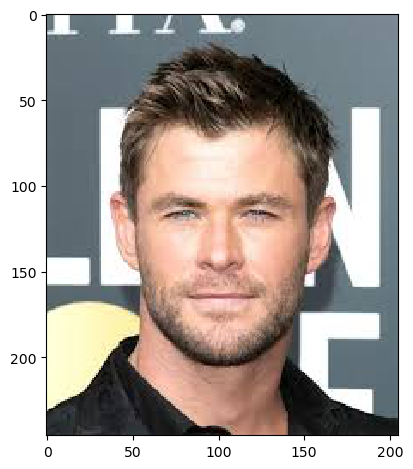

In [23]:
imshow(chris_images[1])

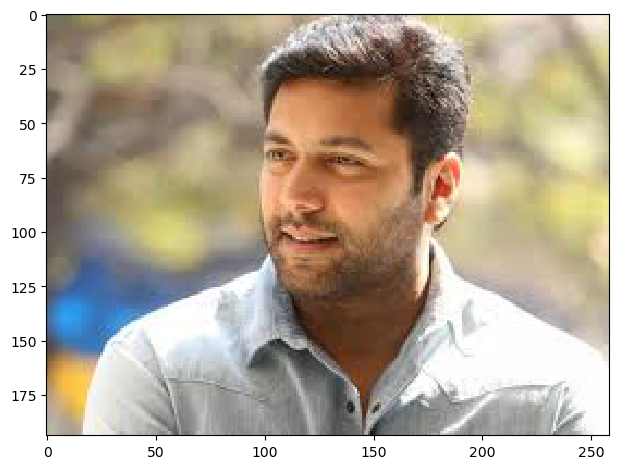

In [27]:
imshow(JAYAM_images[1])

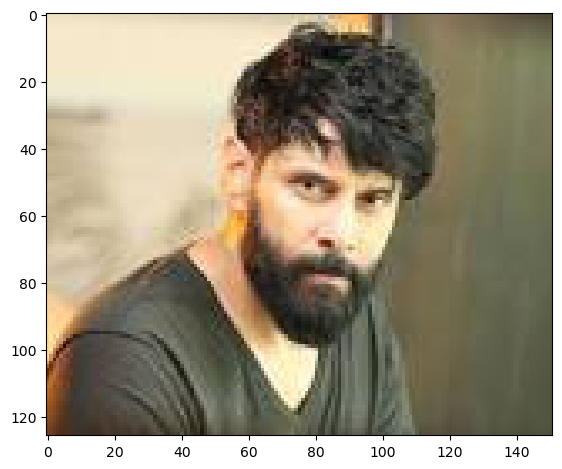

In [28]:
imshow(VIKRAM_images[1])

In [29]:
VIKRAM_images[3].shape

(126, 126, 3)

# Convert Color to Gray
rgb2gray

In [30]:
chris_gray=[None]*limit
j=0
for i in Chris:
    if(j<limit):
        chris_gray[j]=rgb2gray(chris_images[j])
        j+=1
    else:
        break

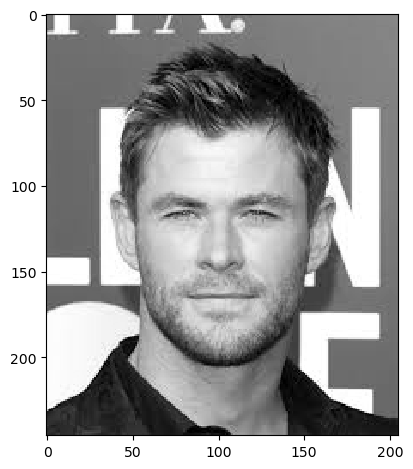

In [31]:
imshow(chris_gray[1])

In [33]:
JAYAM_gray=[None]*limit
j=0
for i in JAYAM:
    if(j<limit):
        JAYAM_gray[j]=rgb2gray(JAYAM_images[j])
        j+=1
    else:
        break

In [34]:
VIKRAM_gray=[None]*limit
j=0
for i in VIKRAM:
    if(j<limit):
        VIKRAM_gray[j]=rgb2gray(VIKRAM_images[j])
        j+=1
    else:
        break

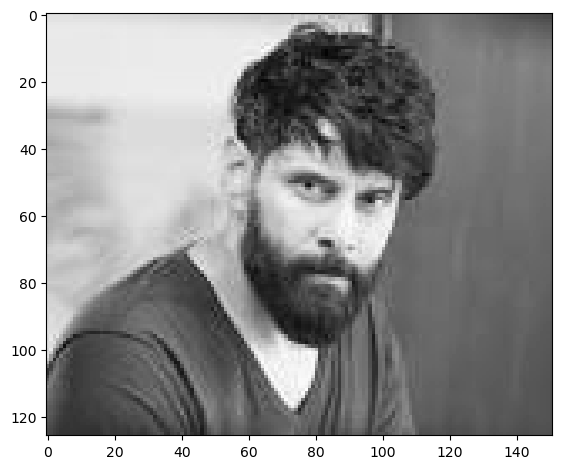

In [35]:
imshow(VIKRAM_gray[1])

In [37]:
VIKRAM_gray[3].shape

(126, 126)

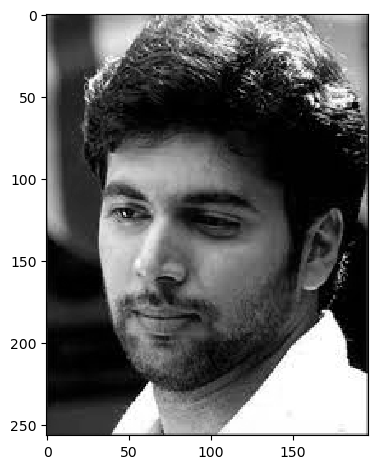

In [38]:
imshow(JAYAM_gray[7])

In [39]:
for j in range(10):
    c=chris_gray[j]
    chris_gray[j]=resize(c,(512,512))

In [40]:
for j in range(10):
    c=JAYAM_gray[j]
    JAYAM_gray[j]=resize(c,(512,512))

In [41]:
for j in range(10):
    c=VIKRAM_gray[j]
    VIKRAM_gray[j]=resize(c,(512,512))

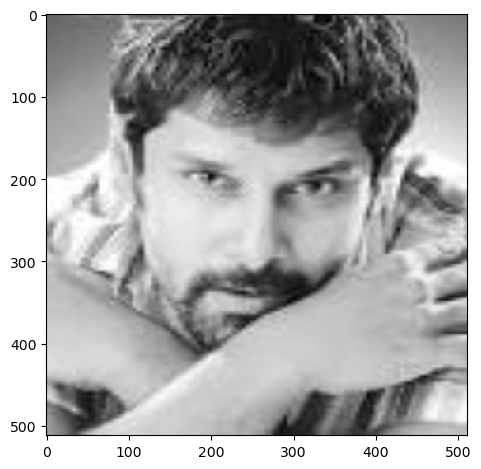

In [43]:
imshow(VIKRAM_gray[2])

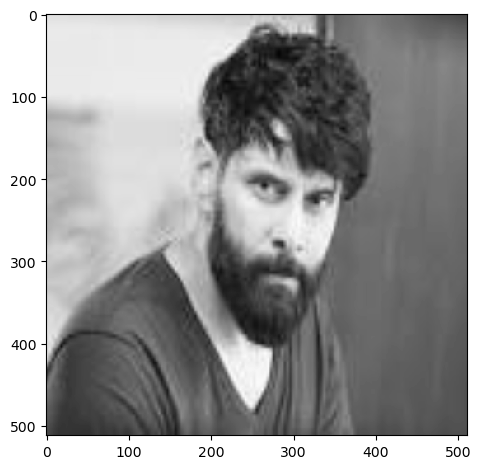

In [45]:
imshow(VIKRAM_gray[1])

In [46]:
VIKRAM_gray[3].shape

(512, 512)

# Image Matrix to Vector Conversion

In [47]:
len_of_images_chris=len(chris_gray)
len_of_images_JAYAM=len(JAYAM_gray)
len_of_images_VIKRAM=len(VIKRAM_gray)

In [51]:
image_size_chris=chris_gray[1].shape

In [52]:
image_size_chris

(512, 512)

In [53]:
image_size_VIKRAM=VIKRAM_gray[1].shape
image_size_JAYAM=JAYAM_gray[1].shape

# Create a variable flatten size which contains product of (512,512)

In [54]:
flatten_size_chris=image_size_chris[0]*image_size_chris[1]

In [55]:
flatten_size_chris

262144

In [60]:
flatten_size_VIKRAM=image_size_VIKRAM[0]*image_size_VIKRAM[1]
flatten_size_VIKRAM

262144

In [63]:
flatten_size_JAYAM=image_size_JAYAM[0]*image_size_JAYAM[1]
flatten_size_chris=image_size_chris[0]*image_size_chris[1]

262144

# Now flatten image from 512,512 matrix to 266144,1 vector

In [56]:
for i in range(len_of_images_chris):
    chris_gray[i]=np.ndarray.flatten(chris_gray[i]).reshape(flatten_size_chris,1)

In [57]:
chris_gray=np.dstack(chris_gray)

In [61]:
for i in range(len_of_images_VIKRAM):
    VIKRAM_gray[i]=np.ndarray.flatten(VIKRAM_gray[i]).reshape(flatten_size_VIKRAM,1)

In [66]:
VIKRAM_gray=np.dstack(VIKRAM_gray)

In [67]:
for i in range(len_of_images_JAYAM):
    JAYAM_gray[i]=np.ndarray.flatten(JAYAM_gray[i]).reshape(flatten_size_JAYAM,1)

In [68]:
JAYAM_gray=np.dstack(JAYAM_gray)

In [69]:
chris_gray=np.rollaxis(chris_gray,axis=2,start=0)

In [70]:
chris_gray.shape

(10, 262144, 1)

In [71]:
VIKRAM_gray=np.rollaxis(VIKRAM_gray,axis=2,start=0)
VIKRAM_gray.shape

(10, 262144, 1)

In [72]:
JAYAM_gray=np.rollaxis(JAYAM_gray,axis=2,start=0)
JAYAM_gray.shape

(10, 262144, 1)

In [76]:
chris_gray=chris_gray.reshape(len_of_images_chris,flatten_size_chris)

In [77]:
chris_gray.shape

(10, 262144)

In [78]:
chris_data=pd.DataFrame(chris_gray)

In [79]:
chris_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.649993,0.650513,0.652735,0.656848,0.661099,0.663320,0.664829,0.664829,0.662362,0.657920,...,0.701872,0.703360,0.704512,0.705245,0.705480,0.705480,0.701421,0.697637,0.697637,0.697637
1,0.475193,0.478934,0.471416,0.463899,0.462968,0.464189,0.463362,0.456584,0.449805,0.517975,...,0.109739,0.110118,0.111688,0.113258,0.114828,0.116398,0.117868,0.119030,0.120193,0.119614
2,0.092347,0.093909,0.090769,0.087628,0.084488,0.081348,0.078208,0.075067,0.071927,0.071169,...,0.108484,0.110124,0.113264,0.116405,0.119545,0.122685,0.125825,0.128966,0.132106,0.130544
3,0.163916,0.164345,0.162599,0.161082,0.161082,0.161082,0.159535,0.157788,0.156042,0.154296,...,0.082854,0.088699,0.094596,0.100589,0.106980,0.116465,0.125951,0.135867,0.145849,0.143397
4,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,...,0.118310,0.118310,0.118310,0.118310,0.118310,0.118310,0.118310,0.119884,0.121607,0.121132
5,0.353142,0.353789,0.353173,0.352525,0.351878,0.351832,0.351832,0.351832,0.351832,0.351832,...,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799
6,0.867133,0.868420,0.863181,0.860010,0.870488,0.880966,0.869783,0.855812,0.859734,0.873705,...,0.629808,0.613064,0.602090,0.601390,0.600558,0.598701,0.596844,0.596250,0.595847,0.595946
7,0.367280,0.367280,0.367280,0.367280,0.367280,0.367280,0.366878,0.365308,0.363738,0.363359,...,0.074121,0.075381,0.076952,0.078522,0.080395,0.082373,0.084638,0.087778,0.090918,0.089356
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.315693,0.286814,0.286100,0.317866,0.344754,0.350693,0.356632,0.367222,0.378254,0.375214
9,0.802787,0.802033,0.803141,0.804250,0.804997,0.805352,0.805706,0.806945,0.808408,0.809871,...,0.089860,0.087086,0.084160,0.081235,0.078309,0.075383,0.073109,0.071435,0.069761,0.070901


In [80]:
VIKRAM_gray=VIKRAM_gray.reshape(len_of_images_VIKRAM,flatten_size_VIKRAM)
VIKRAM_gray.shape
VIKRAM_data=pd.DataFrame(VIKRAM_gray)
VIKRAM_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.642612,0.643013,0.643414,0.643452,0.643051,0.642650,0.642249,0.641848,0.641447,0.640990,...,0.540956,0.542223,0.542688,0.543153,0.543618,0.544083,0.544548,0.544504,0.544039,0.543574
1,0.880933,0.880933,0.880933,0.880933,0.880933,0.880933,0.880933,0.880933,0.880933,0.880933,...,0.314609,0.314609,0.313479,0.312323,0.311166,0.310010,0.308853,0.307697,0.306992,0.308149
2,0.390268,0.389733,0.389428,0.389963,0.390497,0.391032,0.391566,0.391965,0.392288,0.392611,...,0.744510,0.743766,0.743022,0.742381,0.741923,0.741465,0.741008,0.740550,0.740811,0.741269
3,0.887797,0.873691,0.872795,0.886902,0.901008,0.915114,0.914461,0.892104,0.869746,0.847389,...,0.298046,0.297561,0.297076,0.296590,0.296394,0.296394,0.296394,0.296394,0.296394,0.296394
4,0.611953,0.610801,0.609650,0.609703,0.610855,0.612006,0.613158,0.614309,0.615460,0.616680,...,0.300255,0.297838,0.292986,0.288134,0.283282,0.278429,0.273577,0.273352,0.278204,0.283056
5,0.631104,0.631104,0.631104,0.631104,0.631104,0.631104,0.631104,0.631104,0.631104,0.631104,...,0.423970,0.434999,0.446028,0.387756,0.327095,0.349153,0.387756,0.395477,0.389962,0.390698
6,0.221588,0.221588,0.221588,0.221588,0.221588,0.221588,0.221588,0.221588,0.221588,0.221588,...,0.357268,0.350260,0.343252,0.342482,0.348089,0.353695,0.361255,0.369665,0.378075,0.371365
7,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,...,0.955960,0.954474,0.952988,0.950723,0.941280,0.931837,0.926726,0.926726,0.926726,0.926726
8,0.417241,0.416797,0.397648,0.371931,0.340500,0.308738,0.276711,0.250449,0.228341,0.215165,...,0.046232,0.045033,0.045033,0.045033,0.045033,0.045033,0.045033,0.045033,0.045033,0.045033
9,0.299615,0.300628,0.304082,0.311761,0.319608,0.327121,0.336009,0.346133,0.355573,0.364428,...,0.065470,0.058779,0.053088,0.047847,0.045244,0.045575,0.045652,0.045702,0.046526,0.046768


In [81]:
JAYAM_gray=JAYAM_gray.reshape(len_of_images_JAYAM,flatten_size_JAYAM)
JAYAM_gray.shape
JAYAM_data=pd.DataFrame(JAYAM_gray)
JAYAM_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.995513,0.995513,0.995513,0.995513,0.995513,0.995513,0.995513,0.995513,0.995513,0.995513,...,0.078068,0.083030,0.087639,0.091843,0.095722,0.098203,0.100683,0.105370,0.110265,0.108916
1,0.452501,0.452501,0.452501,0.452412,0.452245,0.451788,0.451100,0.450978,0.451264,0.451377,...,0.992598,0.995393,0.992268,0.991287,0.993278,0.994389,0.994389,0.994389,0.994389,0.994389
2,0.863507,0.863507,0.863507,0.863507,0.863507,0.864656,0.866648,0.867429,0.867429,0.868700,...,0.854614,0.858389,0.865311,0.871080,0.875063,0.880731,0.888697,0.896662,0.904628,0.904873
3,0.202459,0.202437,0.202333,0.202315,0.202343,0.203065,0.203980,0.205456,0.207244,0.209380,...,0.439356,0.437158,0.435127,0.433246,0.430592,0.427673,0.424028,0.420641,0.418601,0.418160
4,0.242576,0.241350,0.232477,0.221427,0.209475,0.195301,0.180721,0.168661,0.157257,0.150280,...,0.428563,0.346045,0.191314,0.029574,0.048717,0.064902,0.064902,0.064902,0.064902,0.064902
5,0.816459,0.816459,0.816459,0.816459,0.816459,0.816459,0.816459,0.816459,0.816459,0.816459,...,0.732329,0.726277,0.725991,0.725991,0.725991,0.725991,0.725991,0.725991,0.725991,0.725991
6,0.270296,0.270296,0.270296,0.270296,0.270296,0.270296,0.270810,0.271787,0.271962,0.271962,...,0.399083,0.394227,0.389010,0.380961,0.373824,0.367703,0.360398,0.352746,0.345303,0.343120
7,0.351141,0.332543,0.362920,0.393297,0.391703,0.367114,0.342524,0.321969,0.301541,0.285444,...,0.777215,0.779234,0.782887,0.786238,0.780011,0.773784,0.736576,0.656299,0.576021,0.625171
8,0.847801,0.847801,0.847801,0.847801,0.847801,0.847801,0.847801,0.847801,0.847801,0.847801,...,0.716241,0.731824,0.753754,0.775685,0.804583,0.834255,0.861249,0.883041,0.904833,0.892629
9,0.392394,0.392394,0.392394,0.392394,0.392394,0.392394,0.392394,0.392394,0.392394,0.392394,...,0.159319,0.161577,0.164313,0.182807,0.201301,0.219468,0.219468,0.219468,0.219468,0.219468


In [82]:
chris_data["label"]="chris"

In [83]:
chris_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.649993,0.650513,0.652735,0.656848,0.661099,0.663320,0.664829,0.664829,0.662362,0.657920,...,0.703360,0.704512,0.705245,0.705480,0.705480,0.701421,0.697637,0.697637,0.697637,chris
1,0.475193,0.478934,0.471416,0.463899,0.462968,0.464189,0.463362,0.456584,0.449805,0.517975,...,0.110118,0.111688,0.113258,0.114828,0.116398,0.117868,0.119030,0.120193,0.119614,chris
2,0.092347,0.093909,0.090769,0.087628,0.084488,0.081348,0.078208,0.075067,0.071927,0.071169,...,0.110124,0.113264,0.116405,0.119545,0.122685,0.125825,0.128966,0.132106,0.130544,chris
3,0.163916,0.164345,0.162599,0.161082,0.161082,0.161082,0.159535,0.157788,0.156042,0.154296,...,0.088699,0.094596,0.100589,0.106980,0.116465,0.125951,0.135867,0.145849,0.143397,chris
4,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,...,0.118310,0.118310,0.118310,0.118310,0.118310,0.118310,0.119884,0.121607,0.121132,chris
5,0.353142,0.353789,0.353173,0.352525,0.351878,0.351832,0.351832,0.351832,0.351832,0.351832,...,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,chris
6,0.867133,0.868420,0.863181,0.860010,0.870488,0.880966,0.869783,0.855812,0.859734,0.873705,...,0.613064,0.602090,0.601390,0.600558,0.598701,0.596844,0.596250,0.595847,0.595946,chris
7,0.367280,0.367280,0.367280,0.367280,0.367280,0.367280,0.366878,0.365308,0.363738,0.363359,...,0.075381,0.076952,0.078522,0.080395,0.082373,0.084638,0.087778,0.090918,0.089356,chris
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.286814,0.286100,0.317866,0.344754,0.350693,0.356632,0.367222,0.378254,0.375214,chris
9,0.802787,0.802033,0.803141,0.804250,0.804997,0.805352,0.805706,0.806945,0.808408,0.809871,...,0.087086,0.084160,0.081235,0.078309,0.075383,0.073109,0.071435,0.069761,0.070901,chris


In [84]:
VIKRAM_data["label"]="VIKRAM"
VIKRAM_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.642612,0.643013,0.643414,0.643452,0.643051,0.642650,0.642249,0.641848,0.641447,0.640990,...,0.542223,0.542688,0.543153,0.543618,0.544083,0.544548,0.544504,0.544039,0.543574,VIKRAM
1,0.880933,0.880933,0.880933,0.880933,0.880933,0.880933,0.880933,0.880933,0.880933,0.880933,...,0.314609,0.313479,0.312323,0.311166,0.310010,0.308853,0.307697,0.306992,0.308149,VIKRAM
2,0.390268,0.389733,0.389428,0.389963,0.390497,0.391032,0.391566,0.391965,0.392288,0.392611,...,0.743766,0.743022,0.742381,0.741923,0.741465,0.741008,0.740550,0.740811,0.741269,VIKRAM
3,0.887797,0.873691,0.872795,0.886902,0.901008,0.915114,0.914461,0.892104,0.869746,0.847389,...,0.297561,0.297076,0.296590,0.296394,0.296394,0.296394,0.296394,0.296394,0.296394,VIKRAM
4,0.611953,0.610801,0.609650,0.609703,0.610855,0.612006,0.613158,0.614309,0.615460,0.616680,...,0.297838,0.292986,0.288134,0.283282,0.278429,0.273577,0.273352,0.278204,0.283056,VIKRAM
5,0.631104,0.631104,0.631104,0.631104,0.631104,0.631104,0.631104,0.631104,0.631104,0.631104,...,0.434999,0.446028,0.387756,0.327095,0.349153,0.387756,0.395477,0.389962,0.390698,VIKRAM
6,0.221588,0.221588,0.221588,0.221588,0.221588,0.221588,0.221588,0.221588,0.221588,0.221588,...,0.350260,0.343252,0.342482,0.348089,0.353695,0.361255,0.369665,0.378075,0.371365,VIKRAM
7,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,...,0.954474,0.952988,0.950723,0.941280,0.931837,0.926726,0.926726,0.926726,0.926726,VIKRAM
8,0.417241,0.416797,0.397648,0.371931,0.340500,0.308738,0.276711,0.250449,0.228341,0.215165,...,0.045033,0.045033,0.045033,0.045033,0.045033,0.045033,0.045033,0.045033,0.045033,VIKRAM
9,0.299615,0.300628,0.304082,0.311761,0.319608,0.327121,0.336009,0.346133,0.355573,0.364428,...,0.058779,0.053088,0.047847,0.045244,0.045575,0.045652,0.045702,0.046526,0.046768,VIKRAM


In [85]:
JAYAM_data["label"]="JAYAM"
JAYAM_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.995513,0.995513,0.995513,0.995513,0.995513,0.995513,0.995513,0.995513,0.995513,0.995513,...,0.083030,0.087639,0.091843,0.095722,0.098203,0.100683,0.105370,0.110265,0.108916,JAYAM
1,0.452501,0.452501,0.452501,0.452412,0.452245,0.451788,0.451100,0.450978,0.451264,0.451377,...,0.995393,0.992268,0.991287,0.993278,0.994389,0.994389,0.994389,0.994389,0.994389,JAYAM
2,0.863507,0.863507,0.863507,0.863507,0.863507,0.864656,0.866648,0.867429,0.867429,0.868700,...,0.858389,0.865311,0.871080,0.875063,0.880731,0.888697,0.896662,0.904628,0.904873,JAYAM
3,0.202459,0.202437,0.202333,0.202315,0.202343,0.203065,0.203980,0.205456,0.207244,0.209380,...,0.437158,0.435127,0.433246,0.430592,0.427673,0.424028,0.420641,0.418601,0.418160,JAYAM
4,0.242576,0.241350,0.232477,0.221427,0.209475,0.195301,0.180721,0.168661,0.157257,0.150280,...,0.346045,0.191314,0.029574,0.048717,0.064902,0.064902,0.064902,0.064902,0.064902,JAYAM
5,0.816459,0.816459,0.816459,0.816459,0.816459,0.816459,0.816459,0.816459,0.816459,0.816459,...,0.726277,0.725991,0.725991,0.725991,0.725991,0.725991,0.725991,0.725991,0.725991,JAYAM
6,0.270296,0.270296,0.270296,0.270296,0.270296,0.270296,0.270810,0.271787,0.271962,0.271962,...,0.394227,0.389010,0.380961,0.373824,0.367703,0.360398,0.352746,0.345303,0.343120,JAYAM
7,0.351141,0.332543,0.362920,0.393297,0.391703,0.367114,0.342524,0.321969,0.301541,0.285444,...,0.779234,0.782887,0.786238,0.780011,0.773784,0.736576,0.656299,0.576021,0.625171,JAYAM
8,0.847801,0.847801,0.847801,0.847801,0.847801,0.847801,0.847801,0.847801,0.847801,0.847801,...,0.731824,0.753754,0.775685,0.804583,0.834255,0.861249,0.883041,0.904833,0.892629,JAYAM
9,0.392394,0.392394,0.392394,0.392394,0.392394,0.392394,0.392394,0.392394,0.392394,0.392394,...,0.161577,0.164313,0.182807,0.201301,0.219468,0.219468,0.219468,0.219468,0.219468,JAYAM


In [89]:
actor=pd.concat([chris_data,VIKRAM_data,JAYAM_data])

In [90]:
actor

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.649993,0.650513,0.652735,0.656848,0.661099,0.663320,0.664829,0.664829,0.662362,0.657920,...,0.703360,0.704512,0.705245,0.705480,0.705480,0.701421,0.697637,0.697637,0.697637,chris
1,0.475193,0.478934,0.471416,0.463899,0.462968,0.464189,0.463362,0.456584,0.449805,0.517975,...,0.110118,0.111688,0.113258,0.114828,0.116398,0.117868,0.119030,0.120193,0.119614,chris
2,0.092347,0.093909,0.090769,0.087628,0.084488,0.081348,0.078208,0.075067,0.071927,0.071169,...,0.110124,0.113264,0.116405,0.119545,0.122685,0.125825,0.128966,0.132106,0.130544,chris
3,0.163916,0.164345,0.162599,0.161082,0.161082,0.161082,0.159535,0.157788,0.156042,0.154296,...,0.088699,0.094596,0.100589,0.106980,0.116465,0.125951,0.135867,0.145849,0.143397,chris
4,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,...,0.118310,0.118310,0.118310,0.118310,0.118310,0.118310,0.119884,0.121607,0.121132,chris
5,0.353142,0.353789,0.353173,0.352525,0.351878,0.351832,0.351832,0.351832,0.351832,0.351832,...,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,chris
6,0.867133,0.868420,0.863181,0.860010,0.870488,0.880966,0.869783,0.855812,0.859734,0.873705,...,0.613064,0.602090,0.601390,0.600558,0.598701,0.596844,0.596250,0.595847,0.595946,chris
7,0.367280,0.367280,0.367280,0.367280,0.367280,0.367280,0.366878,0.365308,0.363738,0.363359,...,0.075381,0.076952,0.078522,0.080395,0.082373,0.084638,0.087778,0.090918,0.089356,chris
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.286814,0.286100,0.317866,0.344754,0.350693,0.356632,0.367222,0.378254,0.375214,chris
9,0.802787,0.802033,0.803141,0.804250,0.804997,0.805352,0.805706,0.806945,0.808408,0.809871,...,0.087086,0.084160,0.081235,0.078309,0.075383,0.073109,0.071435,0.069761,0.070901,chris


In [91]:
from sklearn.utils import shuffle

In [97]:
kollywood_indexed = shuffle(actor).reset_index()

In [98]:
kollywood_indexed

,index,0,1,2,3,4,5,6,7,8,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,7,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,...,0.954474,0.952988,0.950723,0.941280,0.931837,0.926726,0.926726,0.926726,0.926726,VIKRAM
1,1,0.880933,0.880933,0.880933,0.880933,0.880933,0.880933,0.880933,0.880933,0.880933,...,0.314609,0.313479,0.312323,0.311166,0.310010,0.308853,0.307697,0.306992,0.308149,VIKRAM
2,7,0.367280,0.367280,0.367280,0.367280,0.367280,0.367280,0.366878,0.365308,0.363738,...,0.075381,0.076952,0.078522,0.080395,0.082373,0.084638,0.087778,0.090918,0.089356,chris
3,3,0.163916,0.164345,0.162599,0.161082,0.161082,0.161082,0.159535,0.157788,0.156042,...,0.088699,0.094596,0.100589,0.106980,0.116465,0.125951,0.135867,0.145849,0.143397,chris
4,3,0.202459,0.202437,0.202333,0.202315,0.202343,0.203065,0.203980,0.205456,0.207244,...,0.437158,0.435127,0.433246,0.430592,0.427673,0.424028,0.420641,0.418601,0.418160,JAYAM
5,4,0.611953,0.610801,0.609650,0.609703,0.610855,0.612006,0.613158,0.614309,0.615460,...,0.297838,0.292986,0.288134,0.283282,0.278429,0.273577,0.273352,0.278204,0.283056,VIKRAM
6,5,0.353142,0.353789,0.353173,0.352525,0.351878,0.351832,0.351832,0.351832,0.351832,...,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,chris
7,2,0.390268,0.389733,0.389428,0.389963,0.390497,0.391032,0.391566,0.391965,0.392288,...,0.743766,0.743022,0.742381,0.741923,0.741465,0.741008,0.740550,0.740811,0.741269,VIKRAM
8,9,0.392394,0.392394,0.392394,0.392394,0.392394,0.392394,0.392394,0.392394,0.392394,...,0.161577,0.164313,0.182807,0.201301,0.219468,0.219468,0.219468,0.219468,0.219468,JAYAM
9,4,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,...,0.118310,0.118310,0.118310,0.118310,0.118310,0.118310,0.119884,0.121607,0.121132,chris


In [101]:
kollywood_actors=kollywood_indexed.drop(['index'],axis=1)

In [102]:
kollywood_actors

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,0.797223,...,0.954474,0.952988,0.950723,0.941280,0.931837,0.926726,0.926726,0.926726,0.926726,VIKRAM
1,0.880933,0.880933,0.880933,0.880933,0.880933,0.880933,0.880933,0.880933,0.880933,0.880933,...,0.314609,0.313479,0.312323,0.311166,0.310010,0.308853,0.307697,0.306992,0.308149,VIKRAM
2,0.367280,0.367280,0.367280,0.367280,0.367280,0.367280,0.366878,0.365308,0.363738,0.363359,...,0.075381,0.076952,0.078522,0.080395,0.082373,0.084638,0.087778,0.090918,0.089356,chris
3,0.163916,0.164345,0.162599,0.161082,0.161082,0.161082,0.159535,0.157788,0.156042,0.154296,...,0.088699,0.094596,0.100589,0.106980,0.116465,0.125951,0.135867,0.145849,0.143397,chris
4,0.202459,0.202437,0.202333,0.202315,0.202343,0.203065,0.203980,0.205456,0.207244,0.209380,...,0.437158,0.435127,0.433246,0.430592,0.427673,0.424028,0.420641,0.418601,0.418160,JAYAM
5,0.611953,0.610801,0.609650,0.609703,0.610855,0.612006,0.613158,0.614309,0.615460,0.616680,...,0.297838,0.292986,0.288134,0.283282,0.278429,0.273577,0.273352,0.278204,0.283056,VIKRAM
6,0.353142,0.353789,0.353173,0.352525,0.351878,0.351832,0.351832,0.351832,0.351832,0.351832,...,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,0.235799,chris
7,0.390268,0.389733,0.389428,0.389963,0.390497,0.391032,0.391566,0.391965,0.392288,0.392611,...,0.743766,0.743022,0.742381,0.741923,0.741465,0.741008,0.740550,0.740811,0.741269,VIKRAM
8,0.392394,0.392394,0.392394,0.392394,0.392394,0.392394,0.392394,0.392394,0.392394,0.392394,...,0.161577,0.164313,0.182807,0.201301,0.219468,0.219468,0.219468,0.219468,0.219468,JAYAM
9,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,0.127813,...,0.118310,0.118310,0.118310,0.118310,0.118310,0.118310,0.119884,0.121607,0.121132,chris


In [105]:
kollywood_actors.to_csv("F:/ip/final/actors.csv")

In [114]:
x=actor.values[:,:-1]

In [115]:
y=actor.values[:,-1]

In [106]:
from sklearn.model_selection import train_test_split

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [117]:
from sklearn import svm

In [118]:
clf=svm.SVC()
clf.fit(x_train,y_train)

SVC()

In [119]:
y_pred =clf.predict(x_test)
y_pred

array(['chris', 'chris', 'chris', 'chris', 'chris', 'chris'], dtype=object)

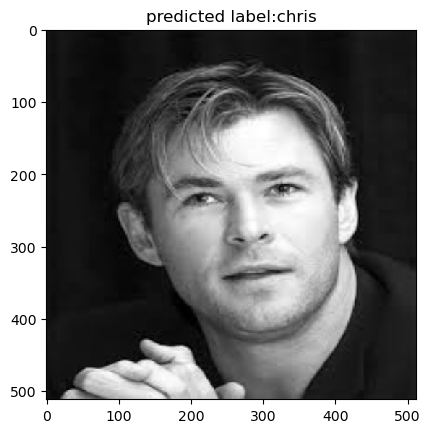

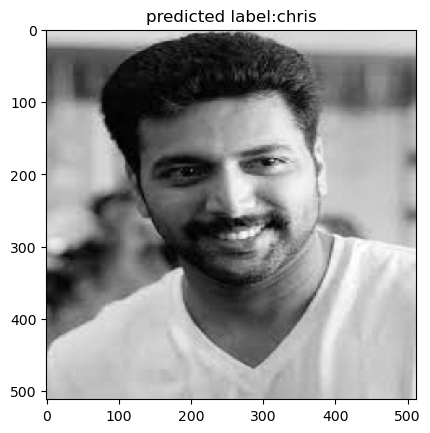

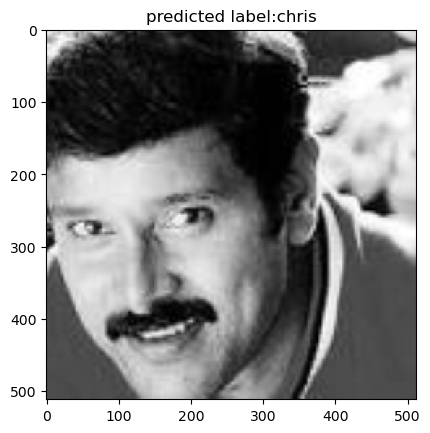

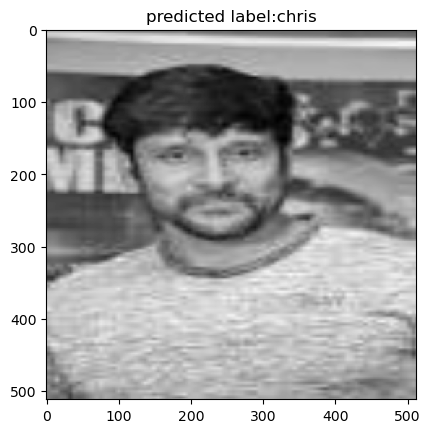

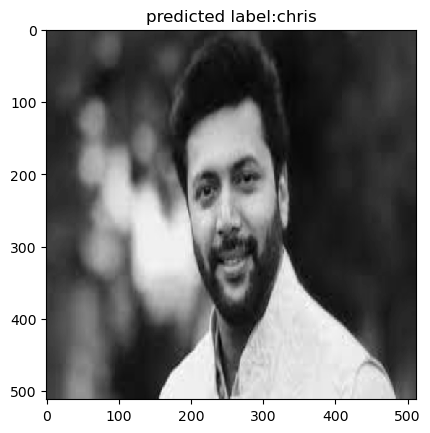

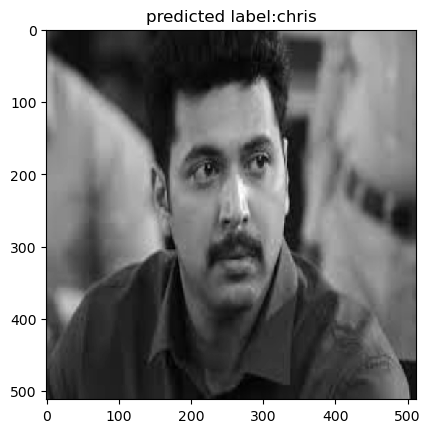

In [129]:
for i in range(6):
    predicted_images=(np.reshape(x_test[i],(512,512)).astype(np.float64))
    plt.title('predicted label:{0}'.format(y_pred[i]))
    plt.imshow(predicted_images,interpolation='nearest',cmap='gray')
    plt.show()

In [131]:
from sklearn import metrics

In [133]:
accuracy=metrics.accuracy_score(y_test,y_pred)

In [134]:
accuracy

0.16666666666666666

In [135]:
from sklearn.metrics import confusion_matrix

In [136]:
confusion_matrix(y_test,y_pred)

array([[0, 0, 3],
       [0, 0, 2],
       [0, 0, 1]], dtype=int64)